Importy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CompressTree import CompressTree
from numpy.linalg import svd
from  timeit import default_timer as timer
from TreeDraw import draw_tree

In [2]:
def gen_mat_with_zeros(how_many_zeros: float, size = 2 **10) -> np.ndarray:
    X = np.random.random((size,size))
    P = np.random.random((size,size))
    return (P > how_many_zeros).astype(int) * X

In [ ]:
def measure_algorithms():
    results = []
    sigmas = []
    for p in [0.99,0.98, 0.95, 0.9, 0.8]:
        mat = gen_mat_with_zeros(p)
        U, Sigma, V = svd(mat)
        sigmas.append([p, Sigma])
        for b in [1, 4]:
            for s in [0,len(Sigma)//2 - 1, len(Sigma)-1]:
                root = CompressTree(mat, 0, len(mat), 0, len(mat[0]))
                start = timer()
                root.create_tree(b, Sigma[s])
                end = timer()
                draw_tree(root, f"zer jest {p}, b wynosi {b}, indeks sigmy {s}")
                decompressed = np.zeros((2**10, 2**10))
                root.decompress(decompressed)
                results.append([p, s, Sigma[s],root.compare(decompressed), end-start])
    df = pd.DataFrame(results, columns=["ile zer", "sigma index", "sigma","błąd", "czas wykonania"])
    df_sigmas = pd.DataFrame(sigmas, columns=["ile zer", "sygmy"])
    return df, df_sigmas

In [5]:
# df, df_sigmas = measure_algorithms()
df = pd.read_csv("./dataframes/meserments.csv", header=0).drop("n", axis=1)
# df_sigmas = pd.read_csv("./dataframes/sigmy.csv", header=0).drop("n", axis=1)

In [10]:
sigmas = []
for p in [0.99,0.98, 0.95, 0.9, 0.8]:
    mat = gen_mat_with_zeros(p)
    U, Sigma, V = svd(mat)
    sigmas.append([p, Sigma])
df_sigmas = pd.DataFrame(sigmas, columns=["ile zer", "sygmy"])

In [6]:
df

,ile zer,sigma index,sigma,błąd,czas wykonania
0,0.99,0,5.856793,3.434155e+03,0.046280
1,0.99,511,1.410554,2.557009e+03,1.328985
2,0.99,1023,0.000597,2.055914e-29,21.577886
3,0.99,0,5.856793,3.390015e+03,0.023853
4,0.99,511,1.410554,2.062169e+03,0.899361
5,0.99,1023,0.000597,1.985398e-27,7.943374
6,0.98,0,11.018371,6.931849e+03,0.025813
7,0.98,511,2.061441,5.899716e+03,0.746639
8,0.98,1023,0.001405,6.901101e-29,36.406361
9,0.98,0,11.018371,6.850461e+03,0.031413


In [10]:
df_sigmas

,ile zer,sygmy
0,0.99,"[5.85679287232922, 4.007518269955654, 3.907082..."
1,0.98,"[11.018371465905318, 5.372072624857488, 5.3269..."
2,0.95,"[26.110064114684196, 8.25132536687747, 8.15997..."
3,0.90,"[51.53429610094235, 11.264157060215567, 11.168..."
4,0.80,"[102.8078877531963, 15.126354271904834, 15.058..."


In [13]:
def plot_sigmas(df):
    col = ["green", "red", "blue", "black", "yellow"]
    xes = [i for i in range(1024)]
    for ind, mat in df.iterrows():
        p = mat['ile zer']
        sigmas = mat['sygmy']
        plt.plot(xes, sigmas, ",", label = f"{int(p*100)}%", color= col[ind])

    plt.title("rozkład sigm dla wypełnienia")
    plt.ylabel("sigmy")
    plt.legend()
    plt.semilogy()
    plt.show()

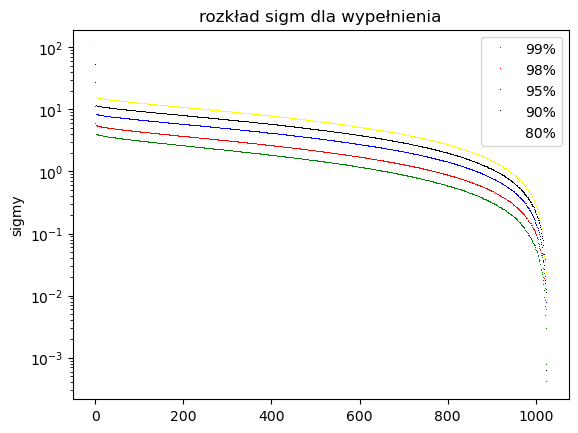

In [15]:
plot_sigmas(df_sigmas)

In [20]:
def plot_features(df, name):
    ses=[0,511,1023]
    col = ["green", "red", "blue", "black", "yellow", "pink"]
    xes = [0.99, 0.98, 0.95, 0.9, 0.8]
    data = [[],[],[],[],[],[]]
    for ind, mat in df.iterrows():
        t = mat[name]
        data[ind%6].append(t)
    for ind, row in enumerate(data):
        b = ((ind % 6 ) // 3)*3+1
        s = ses[(ind % 3)]
        plt.plot(xes, row, ".", label = f"b={b}, s={s}", color= col[ind])

    plt.title(f"{name}")
    plt.ylabel(f"{name}")
    plt.xlabel("% wypełnienia zerami")
    plt.legend()
    plt.semilogy()
    plt.show()

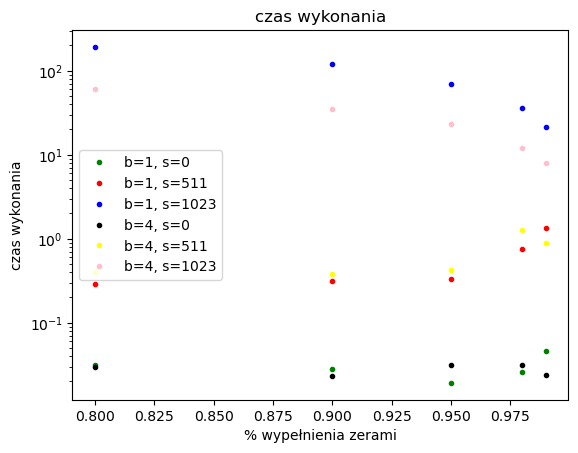

In [21]:
plot_features(df, "czas wykonania")

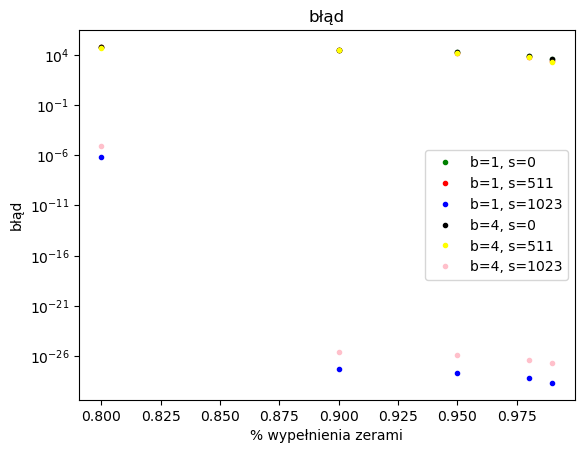

In [22]:
plot_features(df, "błąd")